In [21]:
#Railway Data Engineering Task

#Level 1: Data Exploration and Basic Operations

#Task 1.1: Load and Inspect Data

#import pandas library.
import pandas as pd

#Load the dataset.
df = pd.read_csv("Railway_Info.csv")

#Display first 10 rows of the dataset.  
df.head(10)

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
5,421,LKO-SVDK FTR,LUCKNOW JN.,SHRI MATA VAISHNO DEVI KATRA,Tuesday
6,422,SVDK-LKO FTR,SHRI MATA VAISHNO DEVI KATRA,LUCKNOW JN.,Monday
7,477,FTR TRAIN NO,SIRSA,SIRSA,Sunday
8,502,RJPB-UMB FTR,RAJENDRANAGAR TERMINAL,AMBALA CANTT JN,Monday
9,504,PNBE-BTI FTR,PATNA JN.,BATHINDA JN,Wednesday


In [22]:
#Display the data types of the columns.
df.info()
#display total null values of the dataset.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB


Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

In [23]:
#Task 1.2: Basic Statistics

#Display the number of trains
#df["Train_No"].duplicated()
df["Train_No"].count()

11113

In [24]:
#Display unique source station names
df['Source_Station_Name'].nunique()

921

In [26]:
# Most common source station name
df['Source_Station_Name'].mode()[0]

'CST-MUMBAI'

In [ ]:
# Most common destination station name
df['Destination_Station_Name'].mode()[0]

'CST-MUMBAI'

In [28]:
# Task 1.3 Data Cleaning
# Handle missing values (e.g., drop rows or fill)
df.dropna(inplace=True)  # or use df.fillna('UNKNOWN')

In [ ]:
#Turning the source station name string values to uppercase
df['Source_Station_Name'].str.upper()

0          SAWANTWADI ROAD
1              MADGOAN JN.
2              MADGOAN JN.
3        DELHI-SAFDAR JANG
4               AURANGABAD
               ...        
11108             PUNE JN.
11109             TALEGAON
11110             PUNE JN.
11111             TALEGAON
11112             PUNE JN.
Name: Source_Station_Name, Length: 11113, dtype: object

In [30]:
#Turning the destination station name string values to uppercase
df['Destination_Station_Name'].str.upper()

0                               MADGOAN JN.
1                           SAWANTWADI ROAD
2        CHHATRAPATI SHAHU MAHARAJ TERMINUS
3                         DELHI-SAFDAR JANG
4                              VARANASI JN.
                        ...                
11108                              TALEGAON
11109                          SHIVAJINAGAR
11110                              TALEGAON
11111                              PUNE JN.
11112                              TALEGAON
Name: Destination_Station_Name, Length: 11113, dtype: object

In [36]:
# Level 2 Data Transformation and Aggregation
# Task 2.1 Data Filtering
# Trains that operate during weekends
weekend_trains = df[df['days'].str.contains('Saturday|Sunday', case=False)]
print(weekend_trains)

       Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
0           107  SWV-MAO-VLNK     SAWANTWADI ROAD              MADGOAN JN.   
4           401  BSB BHARATDA          AURANGABAD             VARANASI JN.   
7           477  FTR TRAIN NO               SIRSA                    SIRSA   
19         1120  KRMI-AJNI SP             KARMALI                     AJNI   
21         1196  NGP-KRMI SPL      NAGPUR JN.(CR)                  KARMALI   
...         ...           ...                 ...                      ...   
11097     99829  LNL-PUNE EMU             LONAVLA                 PUNE JN.   
11100     99832  PUNE-LNL EMU        SHIVAJINAGAR                  LONAVLA   
11104     99836  PUNE-TGN EMU            PUNE JN.                  LONAVLA   
11106     99902  PUNE-TGN EMU            PUNE JN.                 TALEGAON   
11112     99908           EMU            PUNE JN.                 TALEGAON   

           days  
0      Saturday  
4      Saturday  
7        

In [37]:
# Trains that operate during weekends
week_day_trains = df[df['days'].str.contains('Monday|Tuesday|Wednesday|Thursday|Friday', case=False)]
print(week_day_trains)

       Train_No    Train_Name           Source_Station_Name  \
1           108  VLNK-MAO-SWV                   MADGOAN JN.   
2           128  MAO-KOP SPEC                   MADGOAN JN.   
3           290  PALACE ON WH             DELHI-SAFDAR JANG   
5           421  LKO-SVDK FTR                   LUCKNOW JN.   
6           422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
...         ...           ...                           ...   
11107     99903  TGN-PUNE EMU                      TALEGAON   
11108     99904  PUNE-TGN EMU                      PUNE JN.   
11109     99905           EMU                      TALEGAON   
11110     99906           EMU                      PUNE JN.   
11111     99907           EMU                      TALEGAON   

                 Destination_Station_Name       days  
1                         SAWANTWADI ROAD     Friday  
2      CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                       DELHI-SAFDAR JANG  Wednesday  
5            SHRI MATA 

In [39]:
#Task 2.2 Grouping and Aggregation
# Count of trains per source station
trains_per_source = df.groupby('Source_Station_Name')['Train_No'].count().sort_values(ascending=False)

# Assuming multiple days are comma-separated: convert to list of days
df['day_list'] = df['days'].str.split(',')

# Explode the list to normalize
exploded_df = df.explode('day_list')
avg_trains_per_day = exploded_df.groupby('Source_Station_Name')['day_list'].count() / 7  # approximate avg
print(avg_trains_per_day)


Source_Station_Name
ABHANPUR JN.      0.285714
ABOHAR            0.142857
ABU ROAD          0.142857
ACHHNERA JN.      0.142857
ADILABAD          0.714286
                    ...   
WARASEONI         0.142857
WARDHA JN.        0.571429
WHITE FIELD       0.285714
YAMUNA BRIDGE     0.285714
YESVANTPUR JN.    8.571429
Name: day_list, Length: 921, dtype: float64


In [41]:
#Task 2.3 Data Enrichment
def categorize_day(day_string):
    days = day_string.lower()
    if any(d in days for d in ['saturday', 'sunday']):
        return 'Weekend'
    return 'Weekday'

df['day_category'] = df['days'].apply(categorize_day)
print(df['day_category'])

0        Weekend
1        Weekday
2        Weekday
3        Weekday
4        Weekend
          ...   
11108    Weekday
11109    Weekday
11110    Weekday
11111    Weekday
11112    Weekend
Name: day_category, Length: 11113, dtype: object


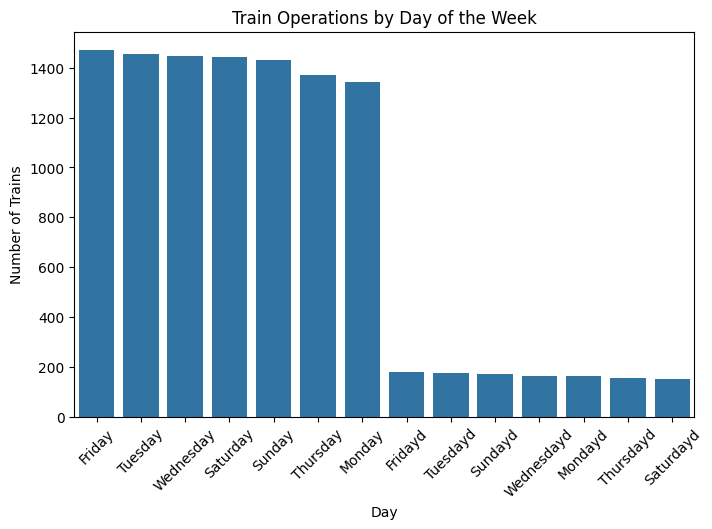

In [43]:
# Level 3: Advanced Data Analysis
# Task 3.1: Pattern Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of train journeys per weekday
day_distribution = exploded_df['day_list'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=day_distribution.index, y=day_distribution.values)
plt.title("Train Operations by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()


In [45]:
# Task 3.2: Correlation and Insights
# Count trains by day
day_counts = exploded_df['day_list'].value_counts()

# Basic correlation: Day vs. Number of Trains
print(day_counts)

# Insights could include:
# - "Saturday has the highest number of operations"
# - "Weekends are busier for stations like XYZ"


day_list
Friday        1471
Tuesday       1454
Wednesday     1448
Saturday      1441
Sunday        1432
Thursday      1372
Monday        1342
Fridayd        178
Tuesdayd       174
Sundayd        170
Wednesdayd     164
Mondayd        161
Thursdayd      154
Saturdayd      152
Name: count, dtype: int64


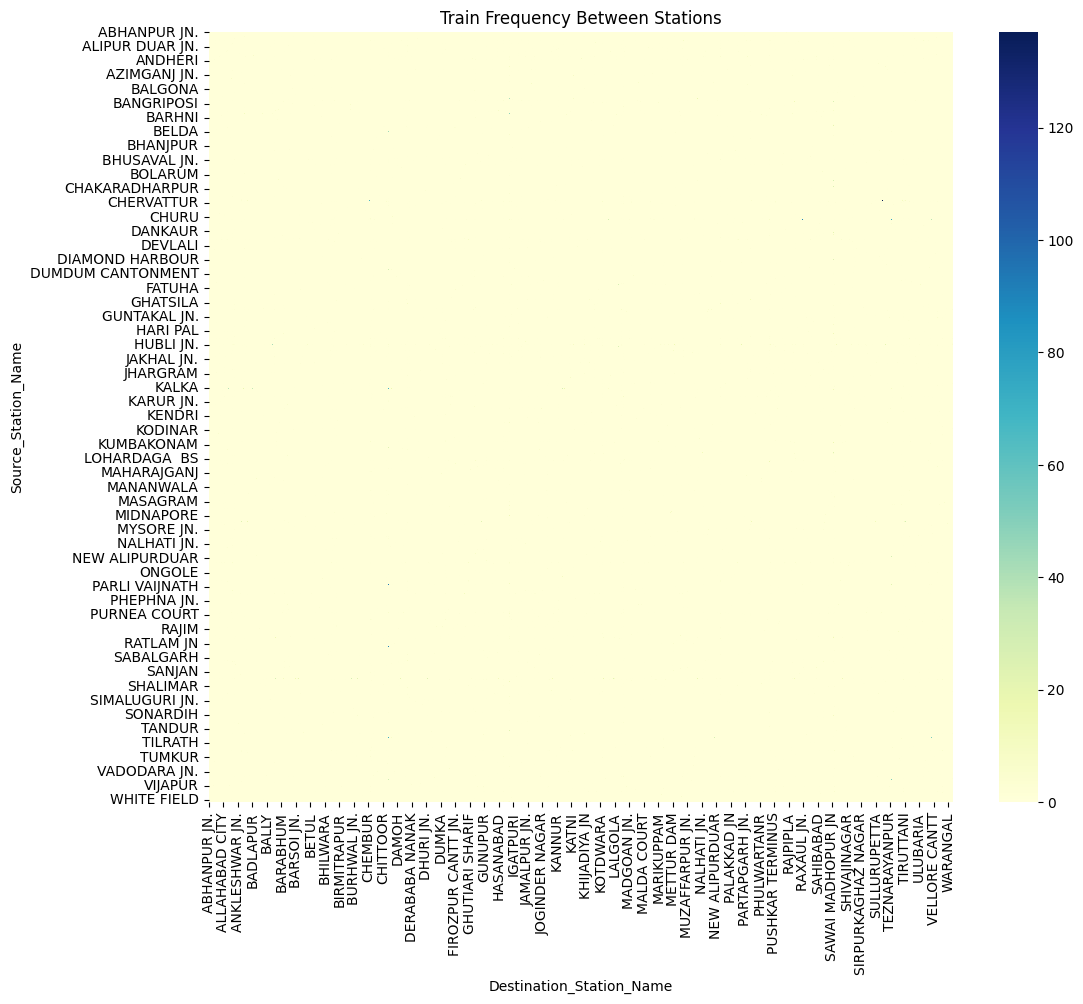

In [48]:
# Level 4: Visualization and Reporting
# Task 4.1: Visualization
# Heatmap of source-destination pairs
pivot_table = df.pivot_table(index='Source_Station_Name', 
                             columns='Destination_Station_Name', 
                             values='Train_No', 
                             aggfunc='count', fill_value=0)

plt.figure(figsize=(12,10))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("Train Frequency Between Stations")
plt.show()